In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from itertools import chain

In [2]:
def import_data(filename):
    '''Import text file with training and 
    validation accuracy data'''

    first_test = txt_to_list(filename)
    trigger = 'acc:'
    trigger_2 = 'accuracy:'
    trigger_3 = 'perplexity:'
    acc_data = [k for k in first_test if 'acc:' in k]
    acc_data = [s[s.index(trigger) + 4:][:7] for s in acc_data]
    acc_data = [float(t.replace(' ', '')) for t in acc_data]

    valid_acc = [j for j in first_test if trigger_2 in j]
    valid_ppl = [j for j in first_test if trigger_3 in j]
    

    # valid_test
    valid_acc = [float(s[s.index(trigger_2) + 10:][:-1]) for s in valid_acc]
    valid_ppl = [float(s[s.index(trigger_3) + 12:][:-1]) for s in valid_ppl]


    n = 25
    ave_data = list(chain.from_iterable([mean(acc_data[i:i+n])]*n for i in range(1,len(acc_data),n)))
    ave_data.insert(0, 0)
    # ave_data = sorted(ave_data)
    valid_ppl.insert(0, 0)
    valid_acc.insert(0, 0)

    return ave_data, valid_ppl, valid_acc
    

def txt_to_list(filename):
    txt_file = open(filename, 'r')
    return txt_file.readlines()
  
    

In [3]:
ave_8, val_ppl_8, val_acc_8 = import_data('F:/OpenNMT models/Model 8/train_log_3')
ave_6, val_ppl_6, val_acc_6 = import_data('F:/OpenNMT models/Model 6/train_log_1')
ave_7, val_ppl_7, val_acc_7 = import_data('F:/OpenNMT models/Model 7/train_log_2')
ave_9, val_ppl_9, val_acc_9 = import_data('F:/OpenNMT models/Model 9/train_log_4')
ave_10, val_ppl_10, val_acc_10 = import_data('F:/OpenNMT models/Model 10/train_log_5.txt')
ave_11, val_ppl_11, val_acc_11 = import_data('F:/OpenNMT models/Model 11/train_log_6')
ave_12, val_ppl_12, val_acc_12 = import_data('F:/OpenNMT models/Model 12/train_log_7')
ave_13, val_ppl_13, val_acc_13 = import_data('F:/OpenNMT models/Model 13/train_log_8')
ave_14, val_ppl_14, val_acc_14 = import_data('F:/OpenNMT models/Model 14/train_log_9')
ave_15, val_ppl_15, val_acc_15 = import_data('F:/OpenNMT models/Model 15/train_log_12')


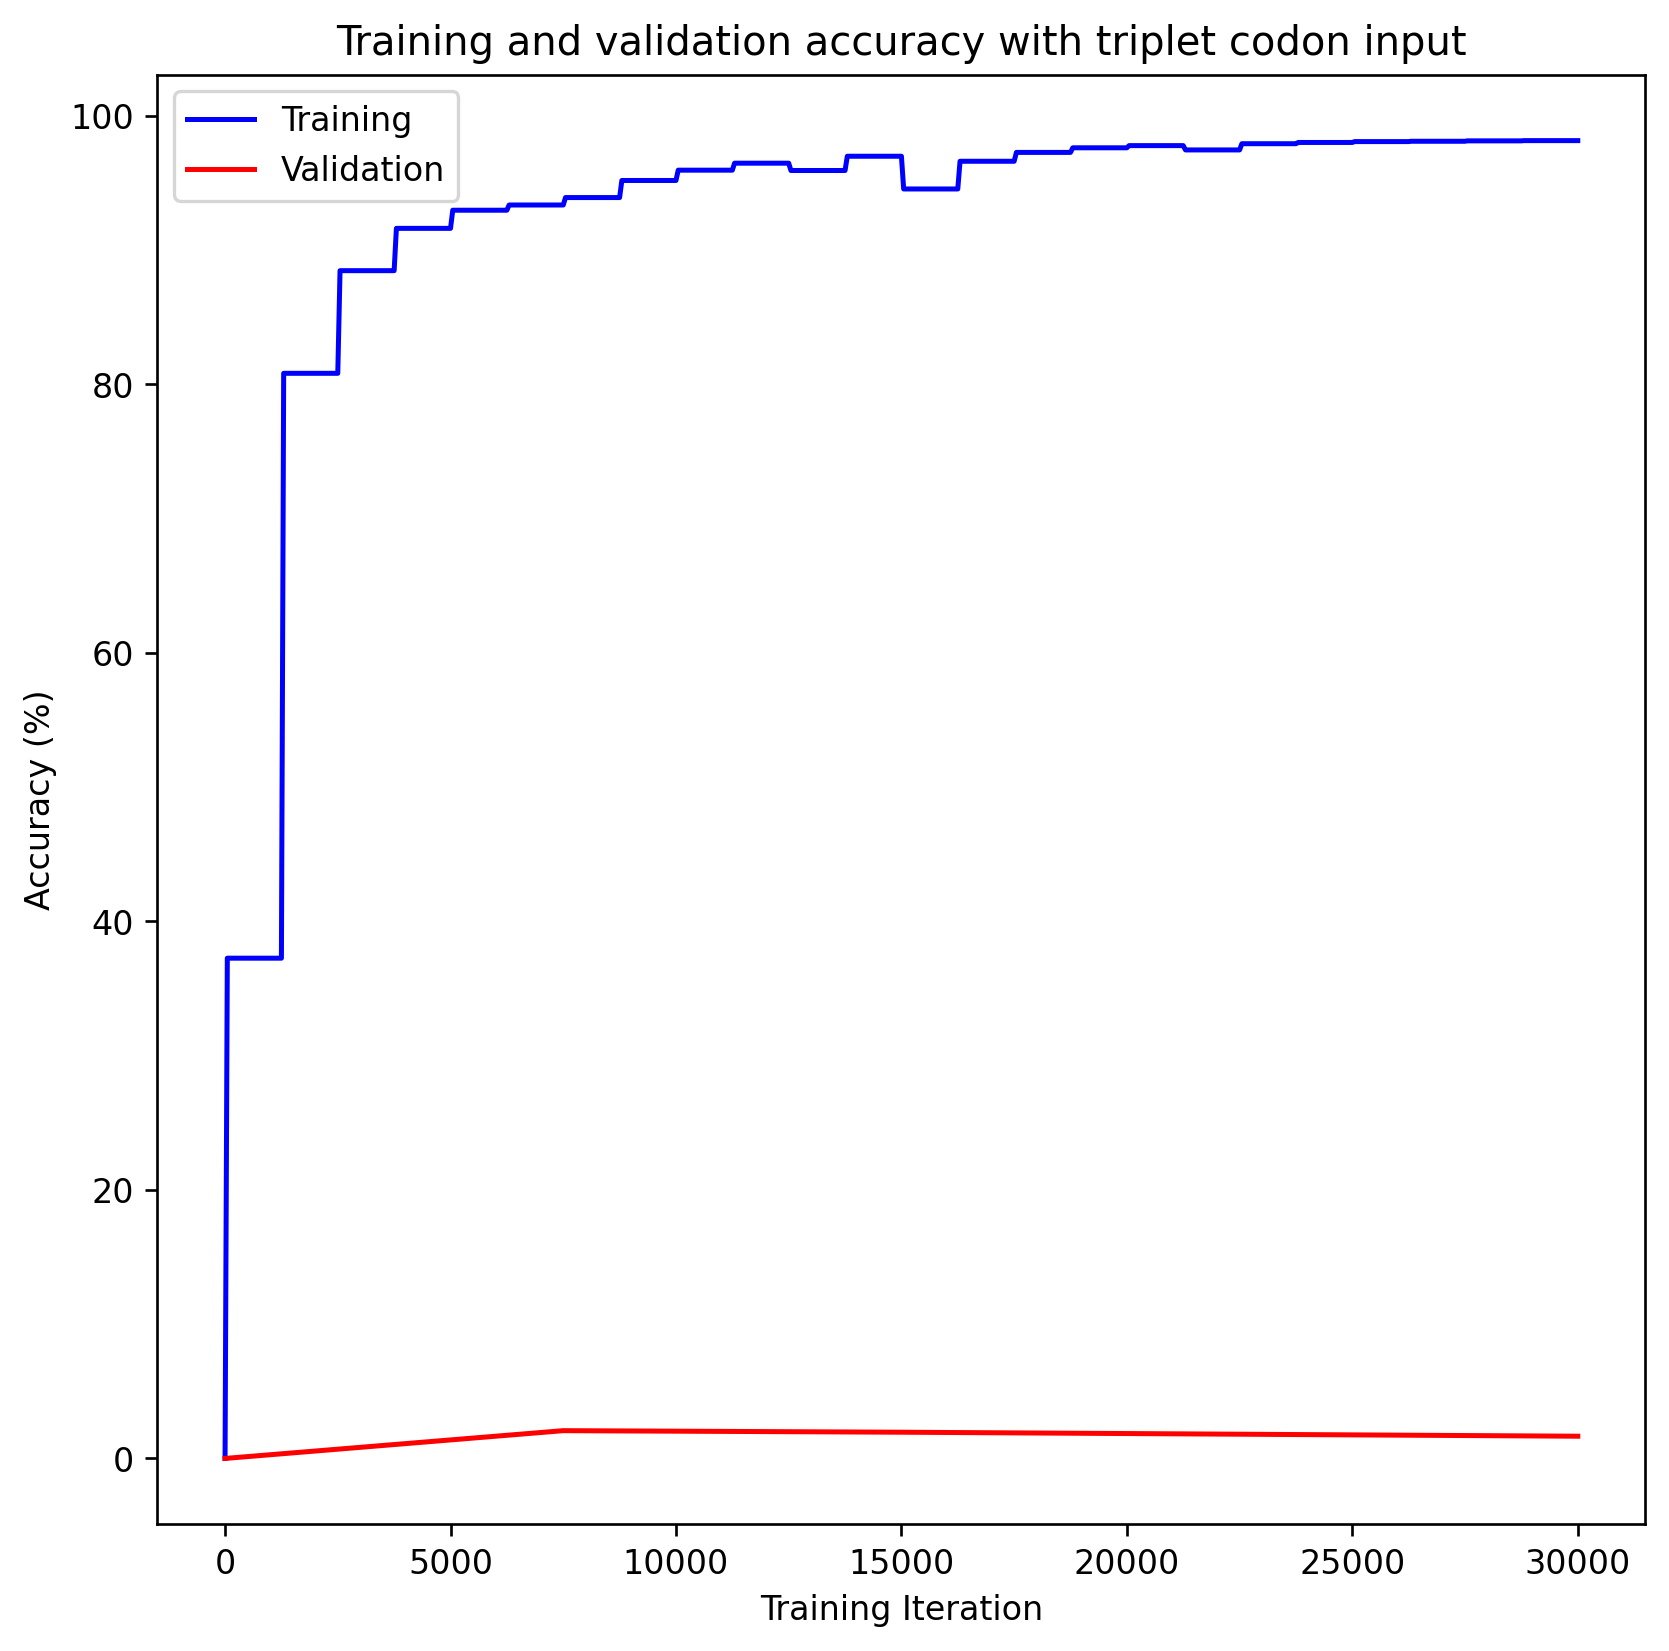

In [10]:
plt.figure(figsize=(8,8), dpi=240)
plt.plot(np.linspace(0, 30000, len(ave_15)), ave_15, c='b', label='Training')
plt.plot([0, 7500, 15000,30000], val_acc_15, c='r', label='Validation')
plt.title('Training and validation accuracy with triplet codon input')
plt.xlabel('Training Iteration')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.savefig('Tripet accuracy')
plt.show()

In [54]:
acc_metrics_keras = txt_to_list(r"C:\Users\Ray\Documents\Bath\Project\Genetic data\Results\Keras.txt")
acc_metrics_OpenNMT = txt_to_list(r"C:\Users\Ray\Documents\Bath\Project\Genetic data\Results\OpenNMT.txt")
acc_metrics_rough_sets = txt_to_list(r"C:\Users\Ray\Documents\Bath\Project\Genetic data\Results\rough_set.txt")


In [65]:
comp_acc = [acc_metrics_keras[1]] + acc_metrics_OpenNMT + acc_metrics_rough_sets
comp_acc = [float(a) * 100 for a in comp_acc]
comp_acc

[74.8363733291626, 25.243796908560434, 99.31773879142301]

In [5]:
plt.figure(figsize=(8,8), dpi=240)
plt.bar(['Feedforward Neural Network', 'LSTM', 'Rough Sets'], comp_acc, color='m')
plt.ylabel('Accuracy (%)')
plt.title('Prediction accuracy')
plt.savefig('Pred metrics')
plt.show()

NameError: name 'comp_acc' is not defined

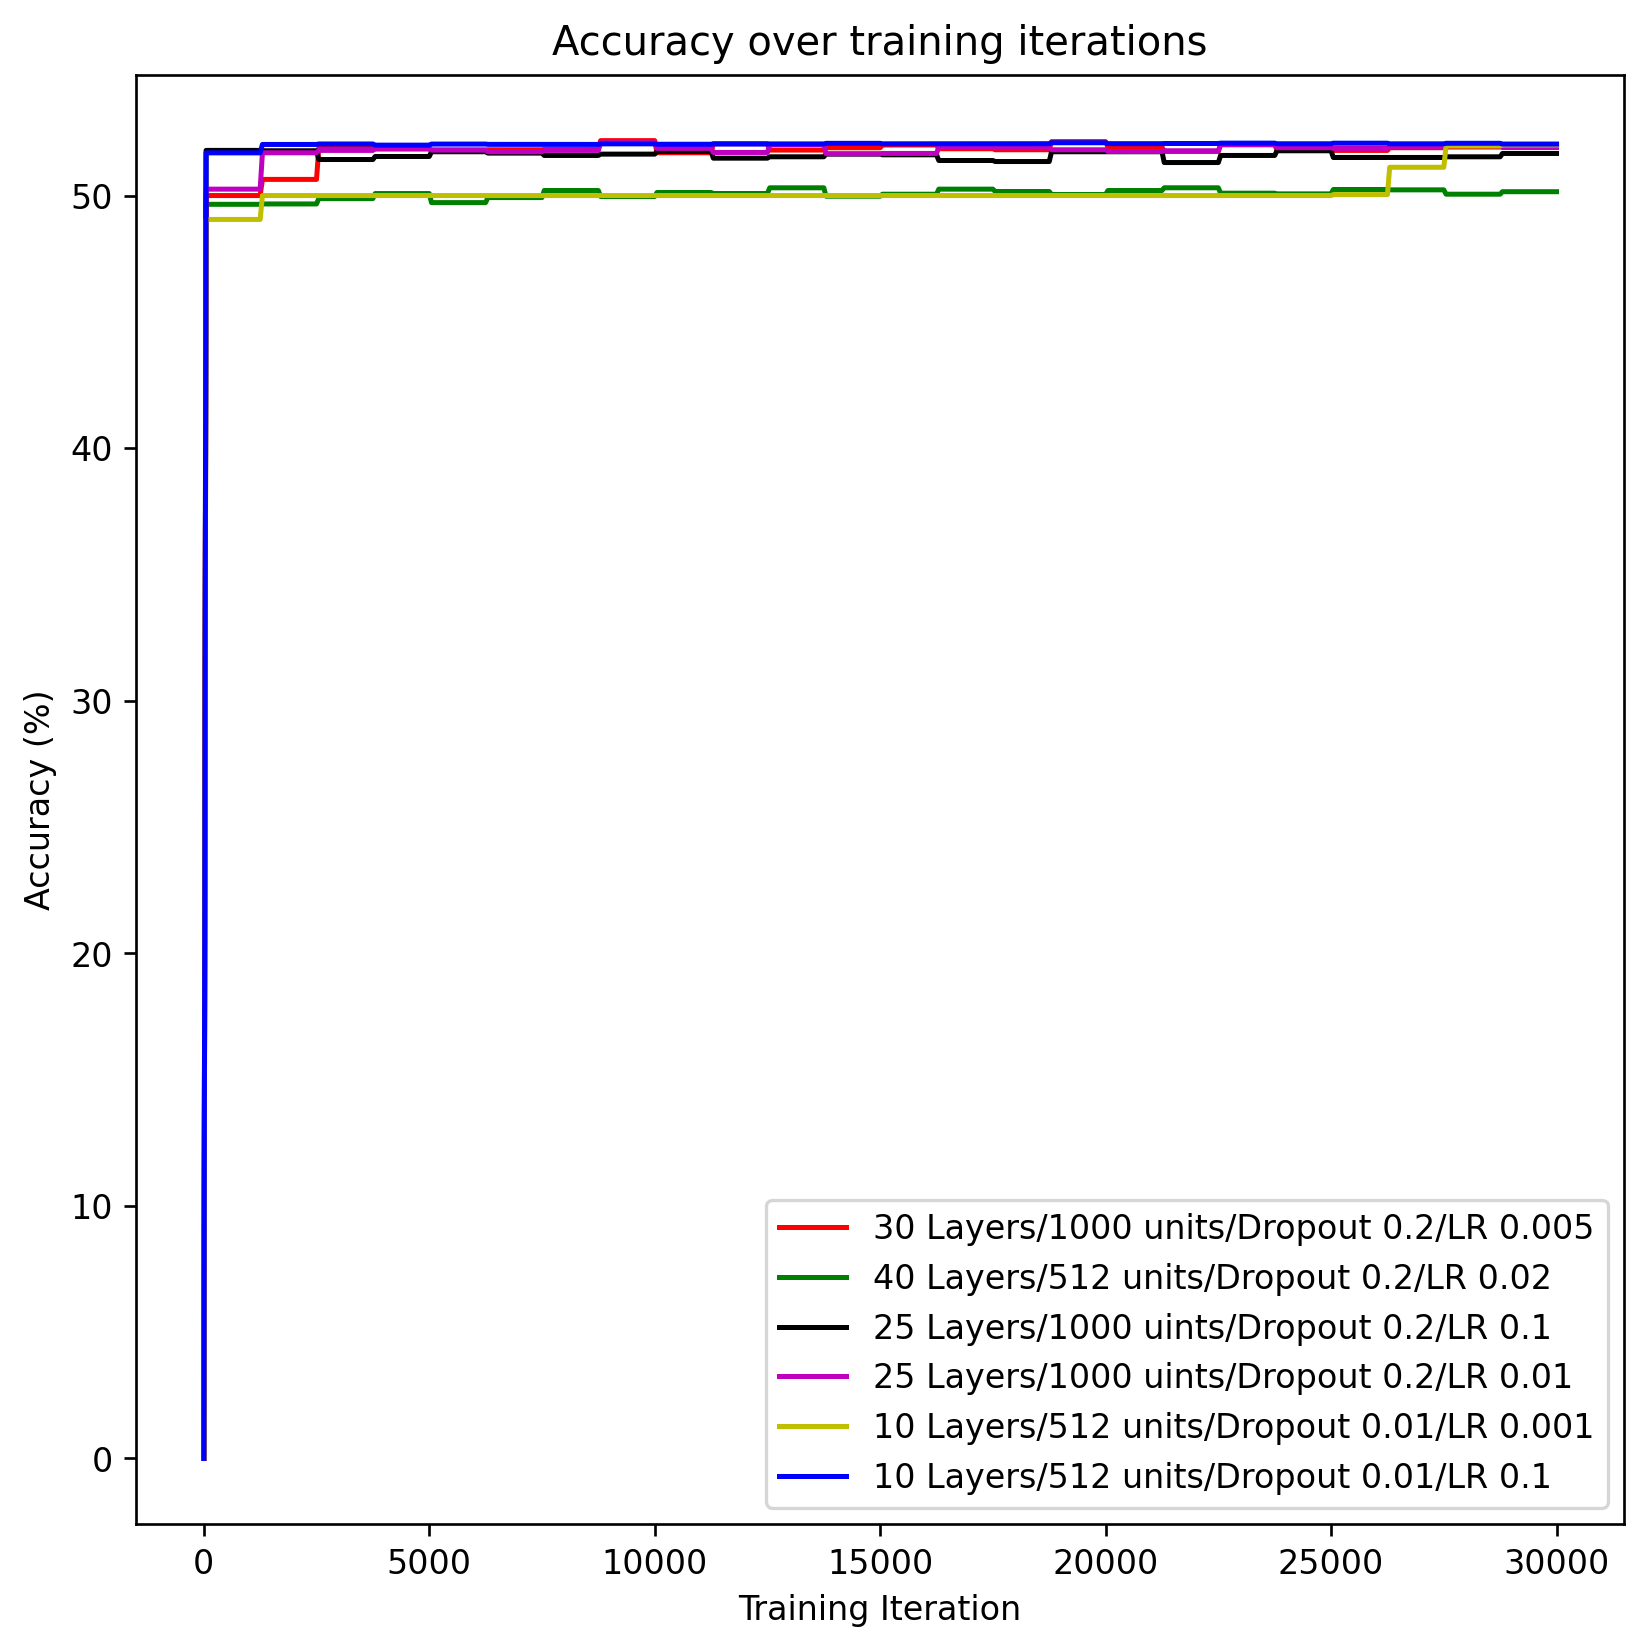

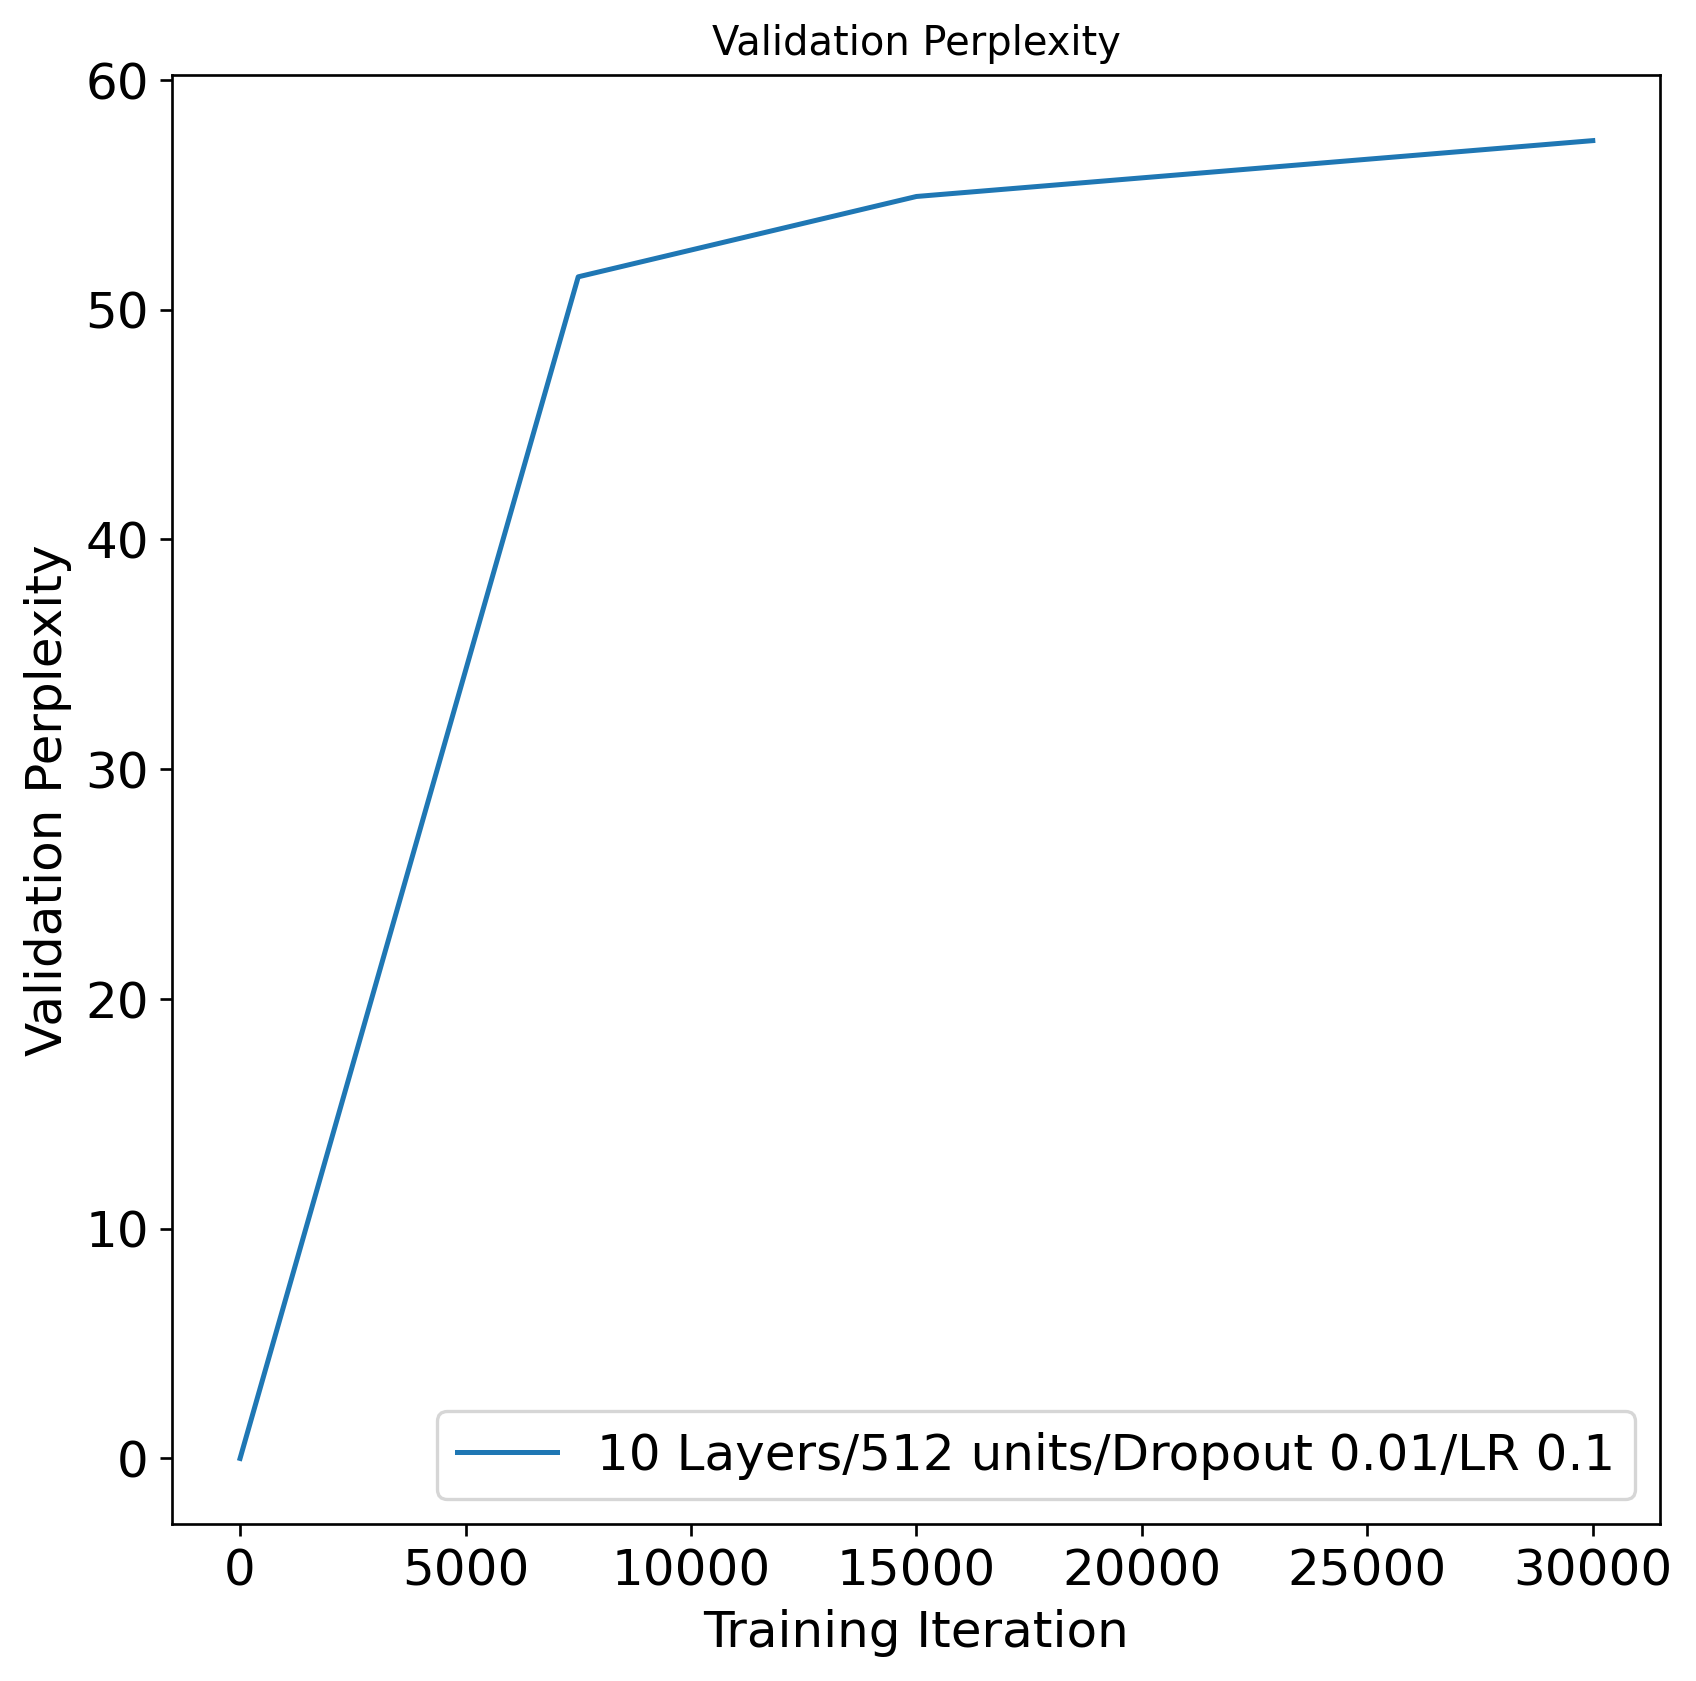

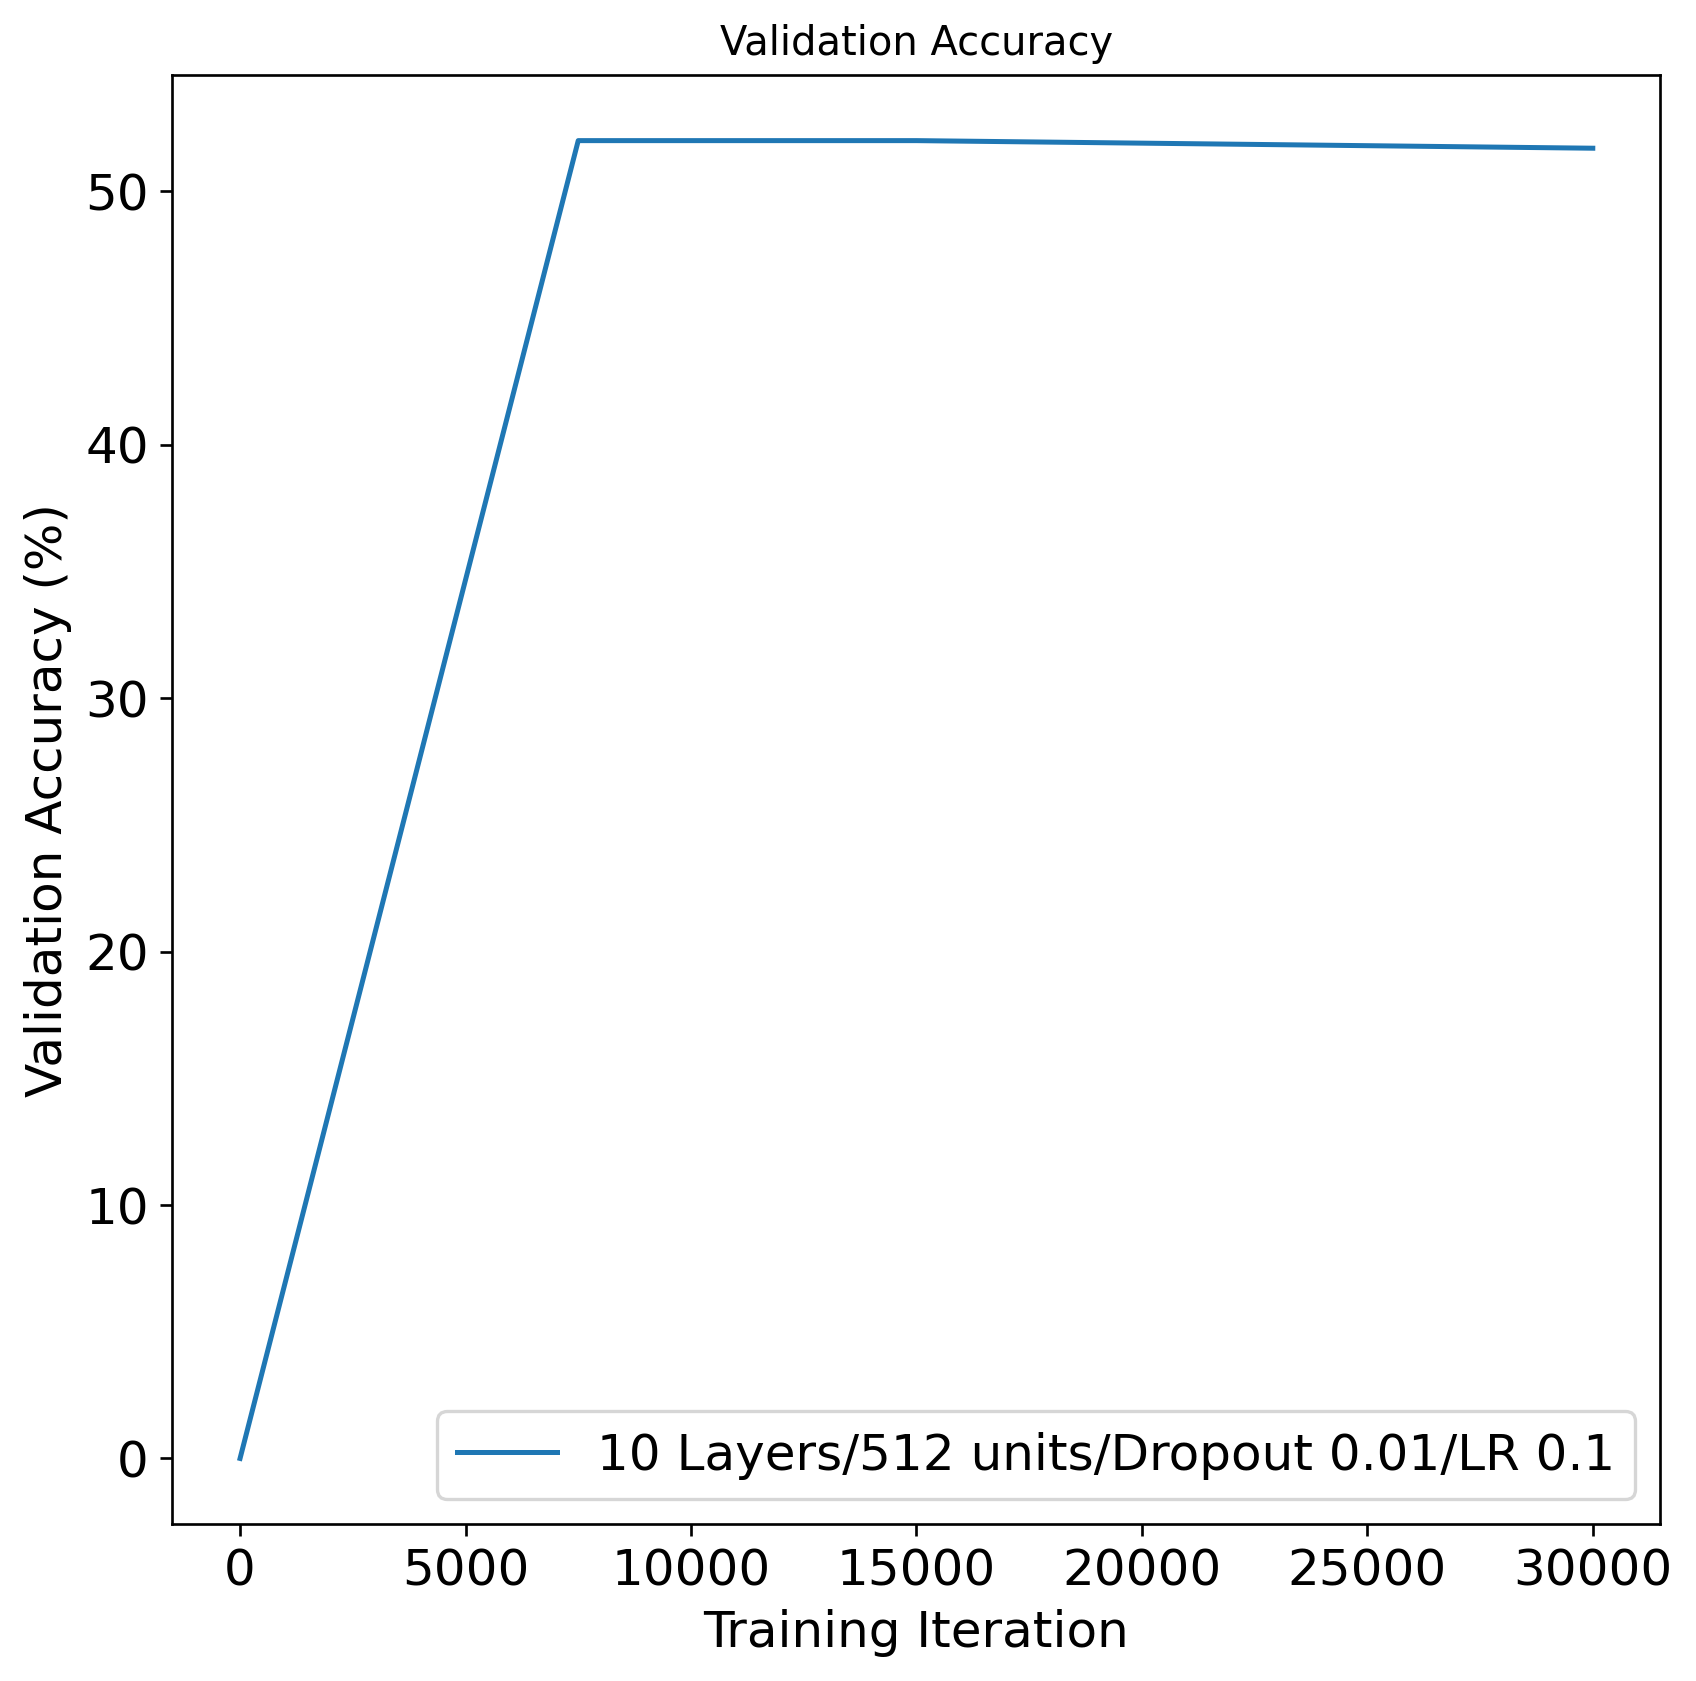

In [11]:
plt.figure(figsize=(8,8), dpi=240)
plt.plot(np.linspace(0, 30000, len(ave_15)), ave_8, c='r', label='30 Layers/1000 units/Dropout 0.2/LR 0.005') 
plt.plot(np.linspace(0, 30000, len(ave_15)), ave_9, c='g', label='40 Layers/512 units/Dropout 0.2/LR 0.02')
plt.plot(np.linspace(0, 30000, len(ave_15)), ave_11, c='k', label='25 Layers/1000 uints/Dropout 0.2/LR 0.1')
plt.plot(np.linspace(0, 30000, len(ave_15)), ave_12, c='m', label='25 Layers/1000 uints/Dropout 0.2/LR 0.01')
plt.plot(np.linspace(0, 30000, len(ave_15)), ave_13, c='y', label='10 Layers/512 units/Dropout 0.01/LR 0.001')
plt.plot(np.linspace(0, 30000, len(ave_15)), ave_14, c='b', label='10 Layers/512 units/Dropout 0.01/LR 0.1')
plt.legend()
plt.title('Accuracy over training iterations')
plt.xlabel('Training Iteration')
plt.ylabel('Accuracy (%)')
plt.savefig('Experiments')
plt.show()

plt.figure(figsize=(8,8), dpi=240)
plt.plot([0, 7500, 15000,30000], np.array(val_ppl_14), label='10 Layers/512 units/Dropout 0.01/LR 0.1')
plt.legend(prop={'size': 15})
plt.title('Validation Perplexity')
plt.xlabel('Training Iteration', fontsize=15)
plt.ylabel('Validation Perplexity', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Validation result')
plt.show()

plt.figure(figsize=(8,8), dpi=240)
plt.plot([0, 7500, 15000,30000], np.array(val_acc_14), label='10 Layers/512 units/Dropout 0.01/LR 0.1')
plt.legend(prop={'size': 15})
plt.title('Validation Accuracy')
plt.xlabel('Training Iteration', fontsize=15)
plt.ylabel('Validation Accuracy (%)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('Validation Accuracy result')
plt.show()
